In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

import matplotlib
 
df = pd.read_excel('Online Retail.xlsx', sheetname='Online Retail')

/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [2]:
#create a new column of revenue
df["Revenue"]=df["UnitPrice"]*df["Quantity"]

In [3]:
df['InvoiceNo']=df['InvoiceNo'].astype(str)

In [4]:
df['CustomerID']=df['CustomerID'].astype(str)

In [5]:
df['Description']=df['Description'].astype(str)

In [6]:
Initial_size=df.shape[0]
Initial_size

541909

In [7]:
# this is the new version
df_dropC_2=df.drop(df[df['InvoiceNo'].str.startswith('C', na=False)].index)

In [8]:
df_dropC_2.shape[0]

532621

In [9]:
# create a new DataFrame with no invoice starting wich C and no 0 unit price
# turns out no data entry satisfy both conditions
df_NoC_and_0unitprice=df.drop(df[(df['InvoiceNo'].str.startswith('C', na=False)) & (df['UnitPrice']==0)].index)
df_NoC_and_0unitprice.shape[0]

541909

In [10]:
# create a new DataFrame with no CustomerID and no 0 unit price
# 539434 remaining
df_0unitprice_and_blankcustomerid=df_NoC_and_0unitprice.drop(df_NoC_and_0unitprice[((df_NoC_and_0unitprice['UnitPrice']==0) & (df_NoC_and_0unitprice['CustomerID']=='nan'))].index)
df_0unitprice_and_blankcustomerid.shape[0]

539434

In [11]:
# the following a fews are just number of each individual condition
df[df['UnitPrice']==0].index

Int64Index([   622,   1970,   1971,   1972,   1987,   1988,   2024,   2025,
              2026,   2406,
            ...
            535333, 535334, 535335, 535336, 536908, 536981, 538504, 538505,
            538554, 538919],
           dtype='int64', length=2515)

In [12]:
df[df['InvoiceNo'].str.startswith('C', na=False)].index

Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,
               241,    939,
            ...
            540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715,
            541716, 541717],
           dtype='int64', length=9288)

In [13]:
df[df['CustomerID']=='nan'].index

Int64Index([   622,   1443,   1444,   1445,   1446,   1447,   1448,   1449,
              1450,   1451,
            ...
            541531, 541532, 541533, 541534, 541535, 541536, 541537, 541538,
            541539, 541540],
           dtype='int64', length=135080)

In [14]:
df[(df['InvoiceNo'].str.startswith('C', na=False)) & (df['UnitPrice']==0)].index

Int64Index([], dtype='int64')

In [15]:
df_NoC_and_0unitprice[((df_NoC_and_0unitprice['UnitPrice']==0) & (df_NoC_and_0unitprice['CustomerID']=='nan'))].index

Int64Index([   622,   1970,   1971,   1972,   1987,   1988,   2024,   2025,
              2026,   2406,
            ...
            535333, 535334, 535335, 535336, 536908, 536981, 538504, 538505,
            538554, 538919],
           dtype='int64', length=2475)

In [16]:
(df_NoC_and_0unitprice['CustomerID']=='nan')

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
541879    False
541880    False
541881    False
541882    False
541883    False
541884    False
541885    False
541886    False
541887    False
541888    False
541889    False
541890    False
541891    False
541892    False
541893    False
541894    False
541895    False
541896    False
541897    False
541898    False
541899    False
541900    False
541901    False
541902    False
541903    False
541904    False
541905    False
541906    False
541907    False
541908    False
Name: CustomerID, Length

In [17]:
df_0unitprice_and_blankcustomerid.shape[0]

539434

In [18]:
df_0unitprice_and_blankcustomerid.iloc[292083]

InvoiceNo                                 562616
StockCode                                  23197
Description    SKETCHBOOK MAGNETIC SHOPPING LIST
Quantity                                      12
InvoiceDate                  2011-08-08 12:28:00
UnitPrice                                   1.45
CustomerID                               14748.0
Country                           United Kingdom
Revenue                                     17.4
Name: 293761, dtype: object

In [19]:
df_nopostage=df_0unitprice_and_blankcustomerid.drop(df_0unitprice_and_blankcustomerid[df_0unitprice_and_blankcustomerid['Description'].str.contains('postage', regex=False, case=False)].index)

In [20]:
df_nopostage.shape[0]

537475

In [21]:
df_cleansed=df_nopostage

In [22]:
df_cleansed.to_csv(r'Online retail_cleansed.csv', index = None, header=True)

# Make sum of revnue in each country into a dataframe

In [23]:
df_cleansed.groupby("Country").groups.keys()

dict_keys(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'])

In [24]:
df_cleansed.groupby("Country").sum()['Revenue']

Country
Australia               1.369900e+05
Austria                 8.698320e+03
Bahrain                 5.484000e+02
Belgium                 3.666296e+04
Brazil                  1.143600e+03
Canada                  3.115440e+03
Channel Islands         2.008629e+04
Cyprus                  1.293129e+04
Czech Republic          6.717200e+02
Denmark                 1.804214e+04
EIRE                    2.632768e+05
European Community      1.150750e+03
Finland                 1.885474e+04
France                  1.823389e+05
Germany                 2.008772e+05
Greece                  4.425520e+03
Hong Kong               9.942040e+03
Iceland                 4.310000e+03
Israel                  7.907820e+03
Italy                   1.524551e+04
Japan                   3.534062e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   1.980470e+03
Netherlands             2.831675e+05
Norway                  3.229296e+04
Poland                  6.8531

In [25]:
# make a revenue_by_country dataframe
Revenue_by_country = df_cleansed.groupby("Country").sum()['Revenue']
Revenue_by_country_df=Revenue_by_country.to_frame()
Revenue_by_country_df

,Revenue
Country,
Australia,1.369900e+05
Austria,8.698320e+03
Bahrain,5.484000e+02
Belgium,3.666296e+04
Brazil,1.143600e+03
Canada,3.115440e+03
Channel Islands,2.008629e+04
Cyprus,1.293129e+04
Czech Republic,6.717200e+02


# Population

In [26]:
population = pd.read_csv('outside data/population.csv')

In [27]:
population=population.set_index('Country Name')


In [28]:
population.columns=['Population']

In [29]:
population

,Population
Country Name,
United Kingdom,62262000.0
Netherlands,16765558.0
EIRE,4588252.0
Germany,81857000.0
France,65350000.0
Australia,22823882.0
Switzerland,8000001.0
Spain,46163116.0
Belgium,10839905.0


# GDP data

In [30]:
gdp = pd.read_csv('outside data/GDP.csv')

In [31]:
gdp

,Country Name,2011
0,Aruba,2.584464e+09
1,Afghanistan,1.793024e+10
2,Angola,1.041160e+11
3,Albania,1.289087e+10
4,Andorra,3.442063e+09
5,Arab World,2.501300e+12
6,United Arab Emirates,3.506660e+11
7,Argentina,5.301630e+11
8,Armenia,1.014211e+10
9,American Samoa,5.740000e+08


In [32]:
gdp=gdp.set_index('Country Name')

In [33]:
type(gdp)

pandas.core.frame.DataFrame

In [34]:
gdp.columns=['GDP']
gdp

,GDP
Country Name,
Aruba,2.584464e+09
Afghanistan,1.793024e+10
Angola,1.041160e+11
Albania,1.289087e+10
Andorra,3.442063e+09
Arab World,2.501300e+12
United Arab Emirates,3.506660e+11
Argentina,5.301630e+11
Armenia,1.014211e+10


In [35]:
# joining gdp with the data frame
#gdp_revenue = gdp.join(Revenue_by_country_df, how='inner')

In [36]:
#gdp_revenue

# GDP per capita data

In [154]:
gdp_per_capita = pd.read_csv('outside data/GDP per capita.csv')

gdp_per_capita=gdp_per_capita.set_index('Country')

gdp_per_capita.columns=['GDP per capita']

#gdp_per_capita_revenue = gdp_per_capita.join(Revenue_by_country_df, how='inner')

#gdp_per_capita_revenue['2011'].corr(gdp_per_capita_revenue['Revenue'])

In [155]:
gdp_per_capita

,GDP per capita
Country,
Aruba,24984.279450
Afghanistan,599.297630
Angola,4615.867475
Albania,4437.177794
Andorra,41098.766940
Arab World,6856.035033
United Arab Emirates,40434.366350
Argentina,12726.908360
Armenia,3526.978143


# revenue devided by # of customers in each country

In [39]:
df_cleansed.groupby("Country").nunique()['CustomerID']

Country
Australia                  9
Austria                   11
Bahrain                    3
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       4
European Community         1
Finland                   12
France                    88
Germany                   95
Greece                     4
Hong Kong                  1
Iceland                    1
Israel                     5
Italy                     15
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  20
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     31
Sweden                     8
Switzerland               22
USA   

In [40]:
no_of_customer_each_country = df_cleansed.groupby("Country").nunique()['CustomerID']

In [143]:
no_of_customer_each_country_df = no_of_customer_each_country.to_frame()
no_of_customer_each_country_df.columns=["no_of_customer_each_country"]
no_of_customer_each_country_df

,no_of_customer_each_country
Country,
Australia,9
Austria,11
Bahrain,3
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


In [42]:
no_of_invoice_each_country = df_cleansed.groupby("Country").nunique()['InvoiceNo']
no_of_invoice_each_country

Country
Australia                  67
Austria                    19
Bahrain                     4
Belgium                   117
Brazil                      1
Canada                      5
Channel Islands            33
Cyprus                     19
Czech Republic              4
Denmark                    20
EIRE                      360
European Community          4
Finland                    45
France                    448
Germany                   589
Greece                      5
Hong Kong                  14
Iceland                     7
Israel                      9
Italy                      51
Japan                      28
Lebanon                     1
Lithuania                   4
Malta                       9
Netherlands                98
Norway                     37
Poland                     24
Portugal                   69
RSA                         1
Saudi Arabia                2
Singapore                  10
Spain                     103
Sweden                     42
Sw

In [43]:
#本来想用total revnue 除以 # of invoices 发现结果并没有什么卵用
no_of_customer_each_country.loc[Europe].corr(internet_using_population["internet_using_population"].loc[Europe])

NameError: name 'Europe' is not defined

In [44]:
Revenue_by_customerID_each_country = df_cleansed.groupby("Country").sum()['Revenue']/df_cleansed.groupby("Country").nunique()['CustomerID']

In [45]:
Revenue_by_customerID_each_country_df = Revenue_by_customerID_each_country.to_frame()

In [46]:
Revenue_by_customerID_each_country_df.columns=['Revenue_by_customerID_each_country']

In [47]:
Revenue_by_customerID_each_country_df

,Revenue_by_customerID_each_country
Country,
Australia,15221.111111
Austria,790.756364
Bahrain,182.800000
Belgium,1466.518400
Brazil,1143.600000
Canada,778.860000
Channel Islands,2231.810000
Cyprus,1616.411250
Czech Republic,671.720000


# Internet usage rate

In [163]:
internet_use = pd.read_excel('outside data/Internet usage.xls', sheetname='Data')

/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [164]:
internet_use=internet_use.set_index('Country Name')


In [165]:
internet_use.columns=['Internet_use']

In [166]:
internet_use

,Internet_use
Country Name,
Aruba,69.000000
Afghanistan,5.000000
Angola,3.100000
Albania,49.000000
Andorra,81.000000
Arab World,26.582764
United Arab Emirates,78.000000
Argentina,51.000000
Armenia,32.000000


# Distance

In [52]:
distance = pd.read_csv('outside data/distance.csv')

In [53]:
distance=distance.set_index('Country Name')

In [54]:
distance

,Distance
Country Name,
United Kingdom,0.0
Netherlands,677.0
EIRE,380.0
Germany,1033.0
France,1091.0
Australia,15206.0
Switzerland,1249.0
Spain,1664.0
Belgium,757.0


# Price_level

In [55]:
price_level = pd.read_csv('outside data/price level.csv')

In [56]:
price_level=price_level.set_index('Country Name')

In [57]:
price_level

,Price level
Country Name,
Australia,1.489749
Austria,1.155721
Bahrain,0.560498
Belgium,1.156468
Brazil,0.879409
Canada,1.253022
Channel Islands,NaN
Cyprus,0.971120
Czech Republic,0.754146


# HFCE

In [58]:
HFCE = pd.read_excel('outside data/HFCE.xlsx', sheetname='Sheet1')

/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [59]:
HFCE=HFCE.set_index('Country Name')

In [60]:
HFCE

,HFCE
Country Name,
United Kingdom,2295311.45
Netherlands,590562.48
EIRE,142031.30
Germany,2643914.84
France,2111348.46
Australia,1120506.29
Switzerland,435763.52
Spain,1049272.41
Belgium,379282.06


# Ecommerce usage rate

In [61]:
Ecommerce_usage_rate = pd.read_excel('outside data/Ecommerce usage rate.xlsx', sheetname='Data')

/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [62]:
Ecommerce_usage_rate=Ecommerce_usage_rate.set_index('Country Name')

In [63]:
Ecommerce_usage_rate

,Ecommerce usage rate
Country Name,
Austria,35
Belgium,31
Bulgaria,5
Croatia,11
Cyprus,16
Czechia,16
Denmark,57
Estonia,16
EU (current composition),33


# Internet using population

In [167]:
internet_using_population = population.join(internet_use, how='inner')

In [168]:
internet_using_population["internet_using_population"]=internet_using_population["Population"]*internet_using_population["Internet_use"]/100

In [169]:
internet_using_population=internet_using_population["internet_using_population"]

In [170]:
internet_using_population = internet_using_population.to_frame()

In [171]:
internet_using_population

,internet_using_population
Country Name,
United Kingdom,5.315929e+07
Netherlands,1.532707e+07
EIRE,3.436141e+06
Germany,6.652518e+07
France,5.085537e+07
Australia,1.814218e+07
Switzerland,6.815443e+06
Spain,3.097083e+07
Belgium,8.846446e+06


# average unit price

In [69]:
average_unit_price = df_cleansed.groupby("Country").mean()['UnitPrice']

In [70]:
average_unit_price = average_unit_price.to_frame()

In [71]:
average_unit_price

,UnitPrice
Country,
Australia,2.738282
Austria,2.980672
Bahrain,4.556316
Belgium,3.062978
Brazil,4.456250
Canada,2.397600
Channel Islands,4.932124
Cyprus,6.288357
Czech Republic,1.576786


# Total quantity

In [72]:
total_quantity = df_cleansed.groupby('Country').sum()['Quantity']

In [73]:
total_quantity = total_quantity.to_frame()

# Average quantity

In [74]:
average_quantity = df_cleansed.groupby("Country").sum()['Quantity']/df_cleansed.groupby("Country").nunique()['CustomerID']

In [75]:
average_quantity = average_quantity.to_frame()

In [76]:
average_quantity.columns = ['average_quantity']

In [77]:
average_quantity

,average_quantity
Country,
Australia,9294.777778
Austria,435.454545
Bahrain,86.666667
Belgium,915.200000
Brazil,356.000000
Canada,690.500000
Channel Islands,1053.222222
Cyprus,789.500000
Czech Republic,592.000000


In [139]:
type(internet_using_population)

pandas.core.frame.DataFrame

In [136]:
no_of_customer_each_country

pandas.core.series.Series

# Now join dataframes

In [78]:
# multiple dataframe join
# http://notconfusing.com/joining-many-dataframes-at-once-in-pandas-n-ary-join/

In [144]:
#其实可以做一个correlation matrix
df_correlation = Revenue_by_country_df.join(gdp, how='inner')

In [145]:
# All outside data

df_correlation = df_correlation.join(population, how='outer')

df_correlation = df_correlation.join(gdp_per_capita, how='inner')

df_correlation = df_correlation.join(internet_using_population, how='inner')

df_correlation = df_correlation.join(internet_use, how='inner')

df_correlation = df_correlation.join(distance, how='outer')

df_correlation = df_correlation.join(Ecommerce_usage_rate, how='outer')

df_correlation = df_correlation.join(HFCE, how='outer')

In [146]:
# all self-made metrics from the original dataset

df_correlation = df_correlation.join(no_of_customer_each_country_df, how='inner')

df_correlation = df_correlation.join(Revenue_by_customerID_each_country_df, how='inner')

df_correlation = df_correlation.join(average_unit_price, how='inner')

df_correlation = df_correlation.join(total_quantity, how='inner')

df_correlation = df_correlation.join(average_quantity, how='inner')

In [147]:
df_correlation

,Revenue,GDP,Population,GDP per capita,internet_using_population,Internet_use,Distance,Ecommerce usage rate,HFCE,no_of_customer_each_country,Revenue_by_customerID_each_country,UnitPrice,Quantity,average_quantity
Australia,1.369900e+05,1.394280e+12,22823882.0,62411.785450,1.814218e+07,79.487698,15206.0,NaN,1120506.29,9,15221.111111,2.738282,83653,9294.777778
Austria,8.698320e+03,4.311200e+11,8452835.0,51374.958410,6.655762e+06,78.739993,1515.0,35.0,300192.65,11,790.756364,2.980672,4790,435.454545
Bahrain,5.484000e+02,2.877660e+10,1234571.0,22512.159600,9.506193e+05,76.999967,5401.0,NaN,16434.68,3,182.800000,4.556316,260,86.666667
Belgium,3.666296e+04,5.270080e+11,10839905.0,47702.811890,8.846446e+06,81.609996,757.0,31.0,379282.06,25,1466.518400,3.062978,22880,915.200000
Brazil,1.143600e+03,2.616200e+12,193946886.0,13167.472890,8.861433e+07,45.690000,8967.0,NaN,1970720.39,1,1143.600000,4.456250,356,356.000000
Canada,3.115440e+03,1.788650e+12,34990400.0,52082.210760,2.904203e+07,83.000000,5807.0,NaN,1406510.65,4,778.860000,2.397600,2762,690.500000
Channel Islands,2.008629e+04,NaN,NaN,NaN,NaN,NaN,374.0,NaN,NaN,9,2231.810000,4.932124,9479,1053.222222
Cyprus,1.293129e+04,2.742716e+10,838897.0,32233.839420,4.769959e+05,56.859892,3592.0,16.0,21315.29,8,1616.411250,6.288357,6316,789.500000
Czech Republic,6.717200e+02,2.279480e+11,10507566.0,21717.457940,7.406783e+06,70.490000,1413.0,NaN,143113.93,1,671.720000,1.576786,592,592.000000
Denmark,1.804214e+04,3.440030e+11,5587085.0,61753.660070,5.017762e+06,89.810013,813.0,57.0,243770.39,9,2004.682222,2.722533,8147,905.222222


# Correlation matrix

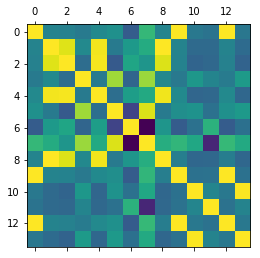

In [148]:


import matplotlib.pyplot as plt

plt.matshow(df_correlation.corr())

In [149]:
corr = df_correlation.corr()
corr.style.background_gradient()

,Revenue,GDP,Population,GDP per capita,internet_using_population,Internet_use,Distance,Ecommerce usage rate,HFCE,no_of_customer_each_country,Revenue_by_customerID_each_country,UnitPrice,Quantity,average_quantity
Revenue,1,0.0768507,0.067421,0.0231156,0.118222,0.170085,-0.179651,0.443126,0.085822,0.998852,-0.00122432,-0.0293133,0.999942,-0.00248803
GDP,0.0768507,1,0.918129,0.119132,0.973763,0.0175747,0.231292,0.35653,0.998123,0.0798749,-0.0911477,-0.0896031,0.0771272,-0.0851957
Population,0.067421,0.918129,1,-0.0677837,0.976709,-0.191498,0.31638,0.200601,0.910913,0.0725875,-0.130898,-0.0998009,0.0671464,-0.131817
GDP per capita,0.0231156,0.119132,-0.0677837,1,0.0221327,0.760887,-0.119999,0.750021,0.110565,0.0112564,0.219462,0.0872942,0.0255859,0.245286
internet_using_population,0.118222,0.973763,0.976709,0.0221327,1,-0.0624793,0.262166,0.349343,0.966348,0.122266,-0.115421,-0.103264,0.118407,-0.11128
Internet_use,0.170085,0.0175747,-0.191498,0.760887,-0.0624793,1,-0.322232,0.9135,0.0140941,0.158033,0.182356,-0.0413906,0.173937,0.226377
Distance,-0.179651,0.231292,0.31638,-0.119999,0.262166,-0.322232,1,-0.664993,0.203119,-0.180922,-0.0412594,0.403763,-0.182545,-0.0483027
Ecommerce usage rate,0.443126,0.35653,0.200601,0.750021,0.349343,0.9135,-0.664993,1,0.37443,0.430799,0.327349,-0.485377,0.447585,0.34386
HFCE,0.085822,0.998123,0.910913,0.110565,0.966348,0.0140941,0.203119,0.37443,1,0.047622,-0.108811,-0.0994065,0.0434901,-0.107794
no_of_customer_each_country,0.998852,0.0798749,0.0725875,0.0112564,0.122266,0.158033,-0.180922,0.430799,0.047622,1,-0.0437302,-0.0342691,0.998471,-0.0458475


# correlation matrix except UK, Australia

In [85]:
df_correlation_no_UK = df_correlation.drop(['United Kingdom','Australia','USA'])

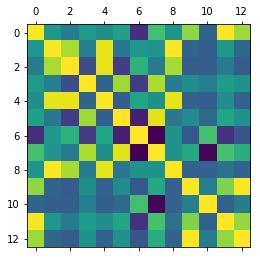

In [86]:
plt.matshow(df_correlation_no_UK.corr())

In [87]:
corr = df_correlation_no_UK.corr()
corr.style.background_gradient()

,Revenue,GDP,Population,GDP per capita,internet_using_population,Internet_use,Distance,Ecommerce usage rate,HFCE,Revenue_by_customerID_each_country,UnitPrice,Quantity,average_quantity
Revenue,1,0.263405,0.0801743,0.293234,0.197286,0.322771,-0.359992,0.528728,0.234822,0.735425,-0.0717054,0.990369,0.768532
GDP,0.263405,1,0.796601,0.101767,0.941099,0.0519326,0.260579,0.242236,0.997829,-0.0698537,-0.102583,0.261758,-0.0529529
Population,0.0801743,0.796601,1,-0.201108,0.946386,-0.2948,0.438652,0.0633436,0.793871,-0.117346,-0.101323,0.0769482,-0.115985
GDP per capita,0.293234,0.101767,-0.201108,1,-0.0726519,0.773009,-0.304655,0.807517,0.0866027,0.20511,0.100804,0.297554,0.23042
internet_using_population,0.197286,0.941099,0.946386,-0.0726519,1,-0.110349,0.352223,0.207114,0.938342,-0.0973014,-0.111663,0.195041,-0.0866094
Internet_use,0.322771,0.0519326,-0.2948,0.773009,-0.110349,1,-0.440121,0.928708,0.0460616,0.180001,-0.0354554,0.348496,0.225298
Distance,-0.359992,0.260579,0.438652,-0.304655,0.352223,-0.440121,1,-0.582011,0.228802,-0.143967,0.530333,-0.350809,-0.16123
Ecommerce usage rate,0.528728,0.242236,0.0633436,0.807517,0.207114,0.928708,-0.582011,1,0.224858,0.385091,-0.557812,0.539503,0.406531
HFCE,0.234822,0.997829,0.793871,0.0866027,0.938342,0.0460616,0.228802,0.224858,1,-0.0841599,-0.0856951,0.0144801,-0.0818477
Revenue_by_customerID_each_country,0.735425,-0.0698537,-0.117346,0.20511,-0.0973014,0.180001,-0.143967,0.385091,-0.0841599,1,0.0983947,0.694017,0.991295


# List of country by cluster

In [88]:
Europe=["Austria", "Belgium", "Channel Islands", "Cyprus", "Czech Republic", "Denmark", "EIRE", "Finland", "France", "Germany", "Greece", "Iceland", "Italy", "Lithuania", "Malta", "Netherlands", "Norway", "Poland", "Portugal", "Spain", "Sweden","Switzerland"]
Middle_East=["Bahrain", "Israel", "Lebanon", "Saudi Arabia", "United Arab Emirates"]
America = ["Brazil","Canada","USA"]
Asia_Pacific = ["Japan", "Hong Kong","Singapore", "Australia"]
UK = ["United Kingdom"]
Others = ["RSA", "Unspecified","European Community"]

In [135]:
Revenue_by_country_df.loc[Europe]

,Revenue
Country,
Austria,8698.32
Belgium,36662.96
Channel Islands,20086.29
Cyprus,12931.29
Czech Republic,671.72
Denmark,18042.14
EIRE,263276.82
Finland,18854.74
France,182338.90


In [89]:
Revenue_by_country_df.loc[UK].sum()

Revenue    7.982969e+06
dtype: float64

In [90]:
Revenue_by_country_df.loc[Europe].sum()

Revenue    1275870.45
dtype: float64

In [91]:
Revenue_by_country_df.loc[Asia_Pacific].sum()

Revenue    191393.05
dtype: float64

In [92]:
Revenue_by_country_df.loc[Middle_East].sum()

Revenue    12146.05
dtype: float64

In [93]:
Revenue_by_country_df.loc[America].sum()

Revenue    5989.96
dtype: float64

In [94]:
Revenue_by_country_df.loc[Others].sum()

Revenue    6902.85
dtype: float64

In [95]:
def correlation_graphs(Region):
    df_correlation_region = df_correlation.loc[Region]
    #plt.matshow(df_correlation_region.corr())
    corr = df_correlation_region.corr()
    return corr.style.background_gradient()

In [150]:
correlation_graphs(Europe)

,Revenue,GDP,Population,GDP per capita,internet_using_population,Internet_use,Distance,Ecommerce usage rate,HFCE,no_of_customer_each_country,Revenue_by_customerID_each_country,UnitPrice,Quantity,average_quantity
Revenue,1,0.4738,0.362803,0.222122,0.450082,0.277922,-0.489172,0.528728,0.457522,0.472861,0.736087,0.0906689,0.98939,0.76883
GDP,0.4738,1,0.951233,0.0788633,0.972167,0.0135253,-0.242036,0.242236,0.999074,0.892567,-0.100988,-0.0252647,0.451115,-0.0908119
Population,0.362803,0.951233,1,-0.135255,0.981087,-0.174076,-0.15506,0.0633436,0.95675,0.805259,-0.147362,0.0161334,0.337759,-0.144234
GDP per capita,0.222122,0.0788633,-0.135255,1,-0.0665035,0.734426,-0.49079,0.807517,0.0549379,0.0942632,0.154752,-0.121384,0.227199,0.171769
internet_using_population,0.450082,0.972167,0.981087,-0.0665035,1,-0.0522041,-0.221701,0.207114,0.973175,0.884057,-0.12118,-0.0212178,0.427265,-0.112095
Internet_use,0.277922,0.0135253,-0.174076,0.734426,-0.0522041,1,-0.643566,0.928708,-0.00764775,0.0930093,0.151074,-0.473797,0.314709,0.19665
Distance,-0.489172,-0.242036,-0.15506,-0.49079,-0.221701,-0.643566,1,-0.582011,-0.224814,-0.198011,-0.411624,0.201527,-0.477328,-0.423064
Ecommerce usage rate,0.528728,0.242236,0.0633436,0.807517,0.207114,0.928708,-0.582011,1,0.224858,0.308024,0.385091,-0.557812,0.539503,0.406531
HFCE,0.457522,0.999074,0.95675,0.0549379,0.973175,-0.00764775,-0.224814,0.224858,1,0.890652,-0.113849,-0.0175581,0.434498,-0.104971
no_of_customer_each_country,0.472861,0.892567,0.805259,0.0942632,0.884057,0.0930093,-0.198011,0.308024,0.890652,1,-0.143685,0.0839596,0.437681,-0.145446


In [97]:
correlation_graphs(Middle_East)

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


,Revenue,GDP,Population,GDP per capita,internet_using_population,Internet_use,Distance,Ecommerce usage rate,HFCE,Revenue_by_customerID_each_country,UnitPrice,Quantity,average_quantity
Revenue,1,-0.117481,-0.237109,0.383788,-0.131011,0.230202,-0.564516,nan,0.0799376,0.668395,0.0138432,0.991508,0.935461
GDP,-0.117481,1,0.94898,0.393793,0.992736,-0.395203,0.377237,nan,0.970465,-0.410036,-0.918348,-0.0431931,-0.138921
Population,-0.237109,0.94898,1,0.0919273,0.97614,-0.634308,0.226702,nan,0.936829,-0.4374,-0.757739,-0.182236,-0.304755
GDP per capita,0.383788,0.393793,0.0919273,1,0.288478,0.641617,0.527012,nan,0.359876,-0.105534,-0.71015,0.474029,0.439268
internet_using_population,-0.131011,0.992736,0.97614,0.288478,1,-0.502233,0.29128,nan,0.9755,-0.376227,-0.864453,-0.0672375,-0.160312
Internet_use,0.230202,-0.395203,-0.634308,0.641617,-0.502233,1,0.440897,nan,-0.455392,-0.0571861,-0.000256746,0.27992,0.272766
Distance,-0.564516,0.377237,0.226702,0.527012,0.29128,0.440897,1,nan,0.173746,-0.777611,-0.589937,-0.468257,-0.505099
Ecommerce usage rate,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HFCE,0.0799376,0.970465,0.936829,0.359876,0.9755,-0.455392,0.173746,nan,1,-0.27267,-0.862943,0.146136,0.0135487
Revenue_by_customerID_each_country,0.668395,-0.410036,-0.4374,-0.105534,-0.376227,-0.0571861,-0.777611,nan,-0.27267,1,0.455508,0.57167,0.80763


In [98]:
correlation_graphs(America)

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


,Revenue,GDP,Population,GDP per capita,internet_using_population,Internet_use,Distance,Ecommerce usage rate,HFCE,Revenue_by_customerID_each_country,UnitPrice,Quantity,average_quantity
Revenue,1,-0.279318,-0.738796,0.764528,-0.51409,0.923213,-0.908922,nan,-0.267048,-0.304487,-0.67798,0.999847,0.872187
GDP,-0.279318,1,0.853465,0.405388,0.967192,0.111124,-0.146491,nan,0.999919,-0.829556,-0.516451,-0.296088,-0.713321
Population,-0.738796,0.853465,1,-0.130423,0.957861,-0.423083,0.390504,nan,0.846748,-0.416974,0.00549741,-0.750484,-0.974036
GDP per capita,0.764528,0.405388,-0.130423,1,0.159852,0.953531,-0.963669,nan,0.417015,-0.846772,-0.99216,0.753124,0.351495
internet_using_population,-0.51409,0.967192,0.957861,0.159852,1,-0.144996,0.109622,nan,0.963873,-0.660474,-0.281962,-0.52903,-0.867964
Internet_use,0.923213,0.111124,-0.423083,0.953531,-0.144996,1,-0.999364,nan,0.123791,-0.647148,-0.908403,0.916342,0.61723
Distance,-0.908922,-0.146491,0.390504,-0.963669,0.109622,-0.999364,1,nan,-0.159096,0.673921,0.922734,-0.901482,-0.588782
Ecommerce usage rate,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HFCE,-0.267048,0.999919,0.846748,0.417015,0.963873,0.123791,-0.159096,nan,1,-0.836611,-0.527331,-0.283881,-0.704324
Revenue_by_customerID_each_country,-0.304487,-0.829556,-0.416974,-0.846772,-0.660474,-0.647148,0.673921,nan,-0.836611,1,0.906612,-0.287762,0.200376


In [172]:
correlation_graphs(Asia_Pacific)

/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


,Revenue,GDP,Population,GDP per capita,internet_using_population,Internet_use,Distance,Ecommerce usage rate,HFCE,no_of_customer_each_country,Revenue_by_customerID_each_country,UnitPrice,Quantity,average_quantity
Revenue,1,-0.147713,-0.194139,0.850385,-0.189482,0.692041,0.884885,nan,-0.130144,0.740562,0.799474,-0.655775,0.998628,0.860252
GDP,-0.147713,1,0.99889,-0.646002,0.999102,0.611716,-0.591409,nan,0.999843,0.555226,-0.712204,-0.649808,-0.0957285,-0.631347
Population,-0.194139,0.99889,1,-0.681243,0.999989,0.573772,-0.628738,nan,0.997897,0.515431,-0.744481,-0.613281,-0.142512,-0.667177
GDP per capita,0.850385,-0.646002,-0.681243,1,-0.677761,0.208689,0.997584,nan,-0.632358,0.276189,0.995926,-0.160434,0.821671,0.999819
internet_using_population,-0.189482,0.999102,0.999989,-0.677761,1,0.577651,-0.625041,nan,0.998193,0.519492,-0.741305,-0.617022,-0.137815,-0.663635
Internet_use,0.692041,0.611716,0.573772,0.208689,0.577651,1,0.276128,nan,0.625654,0.997579,0.119648,-0.998795,0.728886,0.227276
Distance,0.884885,-0.591409,-0.628738,0.997584,-0.625041,0.276128,1,nan,-0.313897,0.488805,0.885754,-0.224788,0.883813,0.979048
Ecommerce usage rate,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HFCE,-0.130144,0.999843,0.997897,-0.632358,0.998193,0.625654,-0.313897,nan,1,0.661785,-0.653504,-0.619972,0.120676,-0.460495
no_of_customer_each_country,0.740562,0.555226,0.515431,0.276189,0.519492,0.997579,0.488805,nan,0.661785,1,0.130944,-0.834485,0.824073,0.359232


# Fahad idea, Ecommerce ranking vs. revenue ranking

In [100]:
ecommerce_ranking = pd.read_csv('outside data/ecommerce rankings.csv')

In [101]:
ecommerce_ranking=ecommerce_ranking.set_index('Country Name')

In [102]:
Fahad = ecommerce_ranking.join(Revenue_by_country_df.rank(), how='inner')
Fahad = Fahad.join(total_quantity.rank(), how='inner')
Fahad = Fahad.join(average_unit_price.rank(), how='inner')

In [103]:
Fahad

,Easiness of starting ecommerce,Revenue,Quantity,UnitPrice
Singapore,2,19.0,20.0,38.0
Denmark,3,23.0,23.0,10.0
Hong Kong,4,20.0,18.0,37.0
Norway,7,27.0,27.0,31.0
USA,8,9.0,11.0,3.0
United Kingdom,9,38.0,38.0,24.0
United Arab Emirates,11,10.0,10.0,14.0
Sweden,12,28.0,32.0,2.0
Lithuania,14,7.0,8.0,13.0
Finland,17,24.0,25.0,18.0


In [104]:
corr = Fahad.corr()
corr.style.background_gradient()

,Easiness of starting ecommerce,Revenue,Quantity,UnitPrice
Easiness of starting ecommerce,1,-0.465142,-0.531007,0.203563
Revenue,-0.465142,1,0.991588,0.0916933
Quantity,-0.531007,0.991588,1,0.0239522
UnitPrice,0.203563,0.0916933,0.0239522,1


# Performance Measurement Index

In [105]:
# remover outliers EIRE and Netherland
import copy
Europe_removed=copy.deepcopy(Europe)
Europe_removed.remove("EIRE")
Europe_removed.remove("Netherlands")
Europe_removed

['Austria',
 'Belgium',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Italy',
 'Lithuania',
 'Malta',
 'Norway',
 'Poland',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland']

In [106]:
Revenue_by_country_df.loc[Europe_removed].describe()

,Revenue
count,20.000000
mean,36471.304500
std,55320.226636
min,671.720000
25%,6246.235000
50%,18448.440000
75%,35570.922500
max,200877.210000


In [107]:
Revenue_by_country_df.loc[Europe_removed].sort_values(by="Revenue")

,Revenue
Country,
Czech Republic,671.72
Lithuania,1661.06
Malta,1980.47
Iceland,4310.00
Greece,4425.52
Poland,6853.14
Austria,8698.32
Cyprus,12931.29
Italy,15245.51


In [108]:
Revenue_by_customerID_each_country_df.loc[Europe_removed]["Revenue_by_customerID_each_country"]

Country
Austria             790.756364
Belgium            1466.518400
Channel Islands    2231.810000
Cyprus             1616.411250
Czech Republic      671.720000
Denmark            2004.682222
Finland            1571.228333
France             2072.032955
Germany            2114.496947
Greece             1106.380000
Iceland            4310.000000
Italy              1016.367333
Lithuania          1661.060000
Malta               990.235000
Norway             3229.296000
Poland             1142.190000
Portugal           1342.951000
Spain              1578.147742
Sweden             4400.863750
Switzerland        2386.606818
Name: Revenue_by_customerID_each_country, dtype: float64

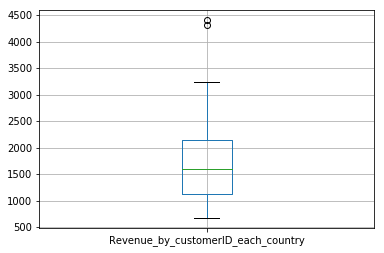

In [109]:
Revenue_by_customerID_each_country_df.loc[Europe_removed]["Revenue_by_customerID_each_country"].to_frame().boxplot()

In [110]:
Revenue_by_customerID_each_country_df.loc[Europe_removed]["Revenue_by_customerID_each_country"]

Country
Austria             790.756364
Belgium            1466.518400
Channel Islands    2231.810000
Cyprus             1616.411250
Czech Republic      671.720000
Denmark            2004.682222
Finland            1571.228333
France             2072.032955
Germany            2114.496947
Greece             1106.380000
Iceland            4310.000000
Italy              1016.367333
Lithuania          1661.060000
Malta               990.235000
Norway             3229.296000
Poland             1142.190000
Portugal           1342.951000
Spain              1578.147742
Sweden             4400.863750
Switzerland        2386.606818
Name: Revenue_by_customerID_each_country, dtype: float64

In [111]:
gdp_per_capita.loc[Europe_removed]["GDP per capita"]

Country
Austria             51374.95841
Belgium             47702.81189
Channel Islands             NaN
Cyprus              32233.83942
Czech Republic      21717.45794
Denmark             61753.66007
Finland             50790.72415
France              43790.73540
Germany             46810.32796
Greece              25916.29353
Iceland             46181.95294
Italy               38334.68385
Lithuania           14357.73523
Malta               22835.37683
Norway             100711.22480
Poland              13890.69624
Portugal            23196.18375
Spain               31835.28880
Sweden              59593.28711
Switzerland         88415.62806
Name: GDP per capita, dtype: float64

In [176]:
Revenue_by_customerID_each_country_df.loc[Europe]["Revenue_by_customerID_each_country"]/gdp_per_capita.loc[Europe]["GDP per capita"].sort_values(ascending=True)


Country
Austria            0.015392
Belgium            0.030743
Channel Islands         NaN
Cyprus             0.050146
Czech Republic     0.030930
Denmark            0.032463
EIRE               1.261231
Finland            0.030935
France             0.047317
Germany            0.045172
Greece             0.042691
Iceland            0.093326
Italy              0.026513
Lithuania          0.115691
Malta              0.043364
Netherlands        0.587649
Norway             0.032065
Poland             0.082227
Portugal           0.057895
Spain              0.049572
Sweden             0.073848
Switzerland        0.026993
dtype: float64

In [112]:
Performance_measurement_Europe = Revenue_by_customerID_each_country_df.loc[Europe_removed]["Revenue_by_customerID_each_country"]/gdp_per_capita.loc[Europe_removed]["GDP per capita"]
Performance_measurement_Europe.sort_values(ascending=True)

Country
Austria            0.015392
Italy              0.026513
Switzerland        0.026993
Belgium            0.030743
Czech Republic     0.030930
Finland            0.030935
Norway             0.032065
Denmark            0.032463
Greece             0.042691
Malta              0.043364
Germany            0.045172
France             0.047317
Spain              0.049572
Cyprus             0.050146
Portugal           0.057895
Sweden             0.073848
Poland             0.082227
Iceland            0.093326
Lithuania          0.115691
Channel Islands         NaN
dtype: float64

In [159]:
Performance_measurement_Asia_Pacific = Revenue_by_customerID_each_country_df.loc[Asia_Pacific]["Revenue_by_customerID_each_country"]/gdp_per_capita.loc[Asia_Pacific]["GDP per capita"]
Performance_measurement_Asia_Pacific.sort_values(ascending=True)
#Performance_measurement_Asia_Pacific.to_csv("Performance_measurement_Asia_Pacific.csv", header=True)

In [113]:
#Performance_measurement.to_csv("Performance_measurement.csv", header=True)
#不要再print了 我已经在里面做过图了！

In [158]:
Performance_measurement_Asia_Pacific.describe()

count    4.000000
mean     0.197454
std      0.084306
min      0.091712
25%      0.151414
50%      0.207598
75%      0.253638
max      0.282907
dtype: float64

In [115]:
# correlation between revenue/# of customer  and GDP per capita, after remove 2 outliers EIRE and Netherlands
Revenue_by_customerID_each_country_df.loc[Europe_removed]["Revenue_by_customerID_each_country"].corr(gdp_per_capita.loc[Europe_removed]["GDP per capita"])

0.5518479368686516

In [116]:
# correlation between revenue/# of customer  and GDP per capita
# maybe  a box plot
Revenue_by_customerID_each_country_df.loc[Europe]["Revenue_by_customerID_each_country"].corr(gdp_per_capita.loc[Europe]["GDP per capita"])

0.1547517152936049

# no. of customers vs. internet using population

In [117]:
#本来想用total revnue 除以 # of invoices 发现结果并没有什么卵用

# 可以写根据correlation matrix得来的
no_of_customer_each_country.loc[Europe].corr(internet_using_population["internet_using_population"].loc[Europe])

0.884057220108073

In [173]:
no_of_customer_each_country.loc[Asia_Pacific].corr(internet_using_population["internet_using_population"].loc[Asia_Pacific])

0.6140001565314186

In [174]:

internet_using_population["internet_using_population"].loc[Asia_Pacific]

Country Name
Japan        1.008177e+08
Hong Kong    5.128871e+06
Singapore    3.771804e+06
Australia    1.814218e+07
Name: internet_using_population, dtype: float64

In [175]:
no_of_customer_each_country.loc[Asia_Pacific]

Country
Japan        8
Hong Kong    1
Singapore    1
Australia    9
Name: CustomerID, dtype: int64

In [118]:
no_of_customer_each_country.loc[Europe]

Country
Austria            11
Belgium            25
Channel Islands     9
Cyprus              8
Czech Republic      1
Denmark             9
EIRE                4
Finland            12
France             88
Germany            95
Greece              4
Iceland             1
Italy              15
Lithuania           1
Malta               2
Netherlands         9
Norway             10
Poland              6
Portugal           20
Spain              31
Sweden              8
Switzerland        22
Name: CustomerID, dtype: int64

In [119]:
(no_of_customer_each_country.loc[Europe].to_frame().join(internet_using_population["internet_using_population"].loc[Europe].to_frame(), how="inner")).to_csv(r'Countrywise quantity.csv', index = True, header=True)

In [120]:
average_unit_price["UnitPrice"].loc[Europe].corr(price_level["Price level"].loc[Europe])

-0.10913461582391047

In [121]:
price_unitprice = average_unit_price.join(price_level, how="inner")

In [122]:
price_unitprice["UnitPrice"].loc[Europe].corr(price_level["Price level"].loc[Europe])

-0.10913461582391047

In [123]:
# write the unit price against price level into a file
price_unitprice.to_csv(r'price level vs unit price.csv', index = True, header=True)

In [124]:
price_unitprice

,UnitPrice,Price level
Australia,2.738282,1.489749
Austria,2.980672,1.155721
Bahrain,4.556316,0.560498
Belgium,3.062978,1.156468
Brazil,4.456250,0.879409
Canada,2.397600,1.253022
Channel Islands,4.932124,NaN
Cyprus,6.288357,0.971120
Czech Republic,1.576786,0.754146
Denmark,2.722533,1.390742


In [125]:

price_level.to_csv(r'new.csv', index = True, header=True)